In [1]:
'''@Author : Subhadeep Bej'''

'@Author : Subhadeep Bej'

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

In [2]:
import datetime

In [3]:
%matplotlib notebook

In [4]:
plt.style.use('default')

# Visualization 1


In [5]:
cov = pd.read_csv('./JHU_data/time_series_covid19_confirmed_global.csv')

In [6]:
cov.drop(index = list(range(217, 223)) + [248, 249, 250, 257], columns= ['Lat', 'Long', 'Province/State'], inplace=True)

In [7]:
countries = sorted(['US', 'India', 'Mexico', 'United Kingdom', 'Brazil', 'Italy', 'Russia'], key= str.lower)

In [8]:
countries

['Brazil', 'India', 'Italy', 'Mexico', 'Russia', 'United Kingdom', 'US']

In [9]:
cov = cov[cov['Country/Region'].isin(countries)].copy()

In [10]:
cov

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20
28,Brazil,0,0,0,0,0,0,0,0,0,...,1402041,1448753,1496858,1539081,1577004,1603055,1623284,1668589,1713160,1755779
131,India,0,0,0,0,0,0,0,0,1,...,585481,604641,625544,648315,673165,697413,719664,742417,767296,793802
137,Italy,0,0,0,0,0,0,0,0,0,...,240578,240760,240961,241184,241419,241611,241819,241956,242149,242363
158,Mexico,0,0,0,0,0,0,0,0,0,...,226089,231770,238511,245251,252165,256848,261750,268008,275003,282283
187,Russia,0,0,0,0,0,0,0,0,0,...,646929,653479,660231,666941,673564,680283,686852,693215,699749,706240
223,United Kingdom,0,0,0,0,0,0,0,0,0,...,283710,283770,283774,284276,284900,285416,285768,286349,286979,287621
225,US,1,1,2,2,5,5,5,5,5,...,2636414,2687588,2742049,2795361,2841241,2891124,2936077,2996098,3054699,3117946


In [11]:
cov.set_index('Country/Region', inplace=True)

In [12]:
cov = cov.T

In [11]:
# cov.head()

Country/Region,Brazil,India,Italy,Mexico,Russia,United Kingdom,US
1/22/20,0,0,0,0,0,0,1
1/23/20,0,0,0,0,0,0,1
1/24/20,0,0,0,0,0,0,2
1/25/20,0,0,0,0,0,0,2
1/26/20,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...
7/5/20,1603055,697413,241611,256848,680283,285416,2891124
7/6/20,1623284,719664,241819,261750,686852,285768,2936077
7/7/20,1668589,742417,241956,268008,693215,286349,2996098
7/8/20,1713160,767296,242149,275003,699749,286979,3054699


In [13]:
cov.reset_index(drop=False, inplace=True)

In [14]:
cov.columns.name = ''
#cov.drop(columns=['Country/Region'], inplace=True)

In [15]:
cov.rename(columns={'index' : 'date'}, inplace=True)

In [16]:
cov['date'] = pd.to_datetime(cov['date'])

In [16]:
# cov.head() 

,date,Brazil,India,Italy,Mexico,Russia,United Kingdom,US
0,2020-01-22,0,0,0,0,0,0,1
1,2020-01-23,0,0,0,0,0,0,1
2,2020-01-24,0,0,0,0,0,0,2
3,2020-01-25,0,0,0,0,0,0,2
4,2020-01-26,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...
165,2020-07-05,1603055,697413,241611,256848,680283,285416,2891124
166,2020-07-06,1623284,719664,241819,261750,686852,285768,2936077
167,2020-07-07,1668589,742417,241956,268008,693215,286349,2996098
168,2020-07-08,1713160,767296,242149,275003,699749,286979,3054699


In [17]:
#colors1 = '#009392,#39b185,#9ccb86,#e9e29c,#eeb479,#e88471,#cf597e'.split(',')
colors2 = ['#0c090d', '#53b3cb', '#a53860', '#f15946', '#432818', '#38618c', '#d90429']

<IPython.core.display.Javascript object>


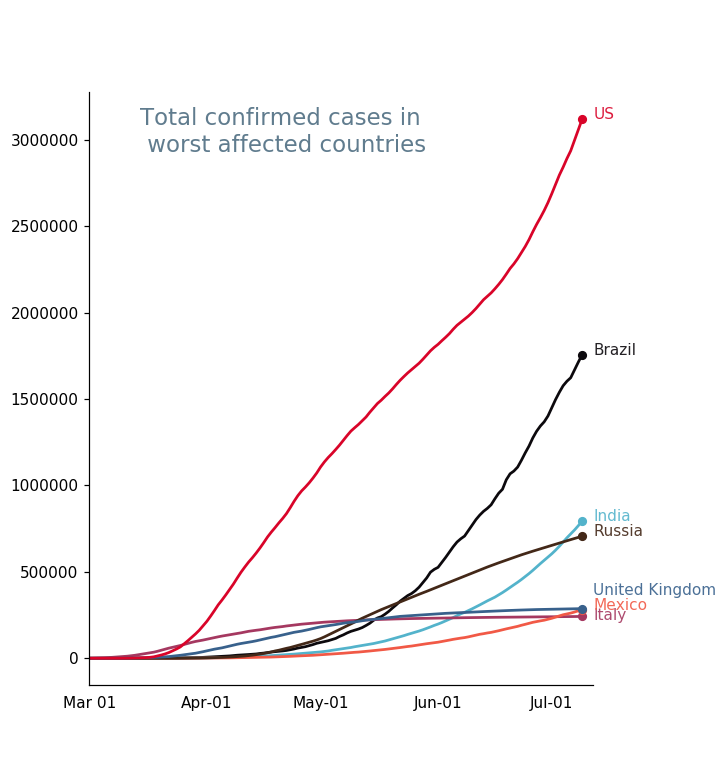

In [18]:
fig1, ax1 = plt.subplots(figsize=(6.5,7))

for j, i  in enumerate(countries) :
    plt.plot(cov['date'], cov[i], label= f'{i}', lw=1.8, markevery=[-1], marker='o', markersize=5, color=colors2[j])

In [78]:
# ax1.legend();

In [66]:
#ax1.set_yscale('log')

In [19]:
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

In [20]:
fmt1 = mdates.DateFormatter('%b %d')

In [21]:
ax1.xaxis.set_major_formatter(fmt1)

In [22]:
ax1.set_xlim(datetime.date(2020, 3, 1), datetime.date(2020, 7, 12));

In [23]:
dates = ['', 'Apr-01', '', '', 'May-01', '', '', 'Jun-01', '', '', 'Jul-01']

In [24]:
ax1.xaxis.set_ticklabels(['Mar 01', '', *dates]);

In [25]:
ax1.tick_params(bottom=False)

In [86]:
# fig1.set_size_inches((6.5, 7.5))

In [26]:
y_offset = cov[cov['date'] == '2020-07-09'].T
y_offset.drop('date', inplace=True)

y_offset.rename({169 : 'y value'}, inplace=True, axis=1)

In [28]:
y = [i for i in y_offset['y value']]

In [29]:
# Trying to find the best positon to annotate

y[2] -=  20000
#y[3] += 100000
y[-2] += 80000

In [30]:
for i in range(len(y)):
    ax1.annotate(s=f'{countries[i]}', xy=(mdates.date2num(datetime.date(2020, 7, 12)), y[i]), xycoords = 'data',
                 fontsize=10, color=colors2[i], alpha=0.9);

In [31]:
plt.subplots_adjust(right=0.83)

In [32]:
ax1.text(x=0.1, y=0.9, s='Total confirmed cases in\n worst affected countries', color='#607c8e', fontsize=15, ha='left'
         , transform=ax1.transAxes);

Text(0.1, 0.9, 'Total confirmed cases in\n worst affected countries')

In [94]:
#fig1.savefig('vis3.png', dpi=120)

# Visualization 2

In [33]:
covid_data_global = pd.read_csv('./JHU_data/time_series_covid19_confirmed_global.csv')

In [34]:
covid_data_global.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,31517,31836,32022,32324,32672,32951,33190,33384,33594,33908
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,2535,2580,2662,2752,2819,2893,2964,3038,3106,3188
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,13907,14272,14657,15070,15500,15941,16404,16879,17348,17808
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,855,855,855,855,855,855,855,855,855,855
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,284,291,315,328,346,346,346,386,386,396


In [35]:
covid_data_global.drop(columns=['Province/State', 'Lat', 'Long'], inplace=True)

In [36]:
covid_data_india = covid_data_global[covid_data_global['Country/Region'] == 'India']

In [37]:
covid_data_india = covid_data_india.T

In [38]:
covid_data_india.reset_index(drop=False, inplace=True)

In [39]:
covid_data_india.drop(range(0,60), inplace=True)

In [40]:
covid_data_india.rename(columns={'index' : 'date', 131 : 'confirmed cases'}, inplace= True)

In [41]:
covid_data_india['date'] = pd.to_datetime(covid_data_india['date'])

In [42]:
covid_data_india.index = range(0, 111)

In [43]:
covid_data_india['new cases'] = np.nan

In [ ]:
for i in range(110):
    covid_data_india['new cases'][i+1] = covid_data_india['confirmed cases'][i+1] - covid_data_india['confirmed cases'][i]
    

In [45]:
covid_data_india.drop(0, inplace=True)

In [46]:
covid_data_india.head()

,date,confirmed cases,new cases
1,2020-03-22,396,66.0
2,2020-03-23,499,103.0
3,2020-03-24,536,37.0
4,2020-03-25,657,121.0
5,2020-03-26,727,70.0


<IPython.core.display.Javascript object>


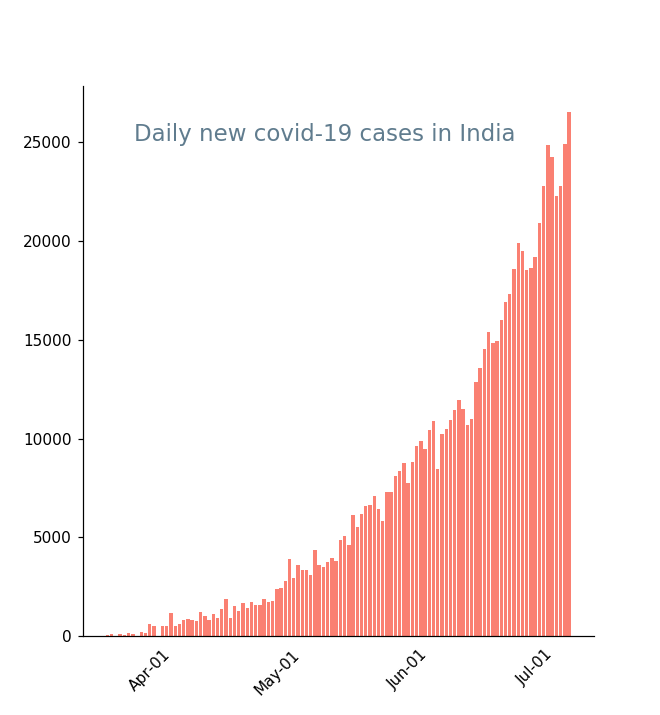

<BarContainer object of 110 artists>

In [47]:
fig, ax = plt.subplots(figsize=(6, 6.5))

ax.bar(covid_data_india['date'], covid_data_india['new cases'], color='salmon', width=0.8)

In [48]:
plt.xticks(rotation=45)

(array([737513., 737516., 737530., 737544., 737546., 737560., 737574.,
        737577., 737591., 737605., 737607.]),
 <a list of 11 Text xticklabel objects>)

In [49]:
fmt1 = mdates.DateFormatter('%b %d')

In [50]:
ax.xaxis.set_major_formatter(fmt1)

In [51]:
dates = [
 '',
 'Apr-01',
 '',
 '',
 'May-01',
 '',
 '',
 'Jun-01',
 '',
 '',
 'Jul-01'
]

In [52]:
ax.xaxis.set_ticklabels(dates);

In [53]:
plt.tick_params(bottom=False)

In [54]:
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


In [55]:
ax.text(x=0.1, y=0.9, s='Daily new covid-19 cases in India', fontsize=15, color='#607c8e', ha='left', transform = ax.transAxes);

In [50]:
#fig.savefig('vis2.png', dpi=100)

# Visualization 3

In [56]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
import matplotlib.cbook as cbook 
import matplotlib.image as image

In [58]:
# from matplotlib import rc

In [59]:
# plt.rc('text', usetex=True)

In [60]:
with cbook.get_sample_data('c://users/subhadeep bej/virtual_environments/python-plotting/assignments/Twitter-256.png') as file:
    im = image.imread(file)

In [61]:
%matplotlib notebook 

In [62]:
plt.style.use('default')

In [63]:
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [64]:
india = gpd.read_file('c://users/subhadeep bej/desktop/geopandas/IND_adm/IND_adm1.shp')[['NAME_1', 'geometry']]

In [65]:
india.head()

,NAME_1,geometry
0,Andaman and Nicobar,"MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8..."
1,Andhra Pradesh,"MULTIPOLYGON (((80.27458 13.45958, 80.27458 13..."
2,Arunachal Pradesh,"POLYGON ((96.15778 29.38310, 96.16380 29.37668..."
3,Assam,"MULTIPOLYGON (((89.87145 25.53730, 89.87118 25..."
4,Bihar,"MULTIPOLYGON (((88.10548 26.53904, 88.10505 26..."


In [66]:
india.rename(columns = {'NAME_1' : 'States'}, inplace=True)

In [67]:
covid_data2 = pd.read_csv('./covid_india_dataset/complete.csv')

In [68]:
cov = covid_data2[covid_data2['Date'] == '2020-07-10'].copy()

In [69]:
cov['active cases'] = cov['Total Confirmed cases'] - cov['Death'] - cov['Cured/Discharged/Migrated']

In [70]:
cov.head()

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered,active cases
3720,2020-07-10,Andaman and Nicobar Islands,11.7401,92.6586,151,0,83,2,0,6,68
3721,2020-07-10,Andhra Pradesh,15.9129,79.7400,23814,277,12154,1555,13,1053,11383
3722,2020-07-10,Arunachal Pradesh,28.2180,94.7278,302,2,120,15,0,11,180
3723,2020-07-10,Assam,26.2006,92.9376,14032,22,8729,696,6,0,5281
3724,2020-07-10,Bihar,25.0961,85.3131,13944,115,9816,755,8,262,4013


<IPython.core.display.Javascript object>


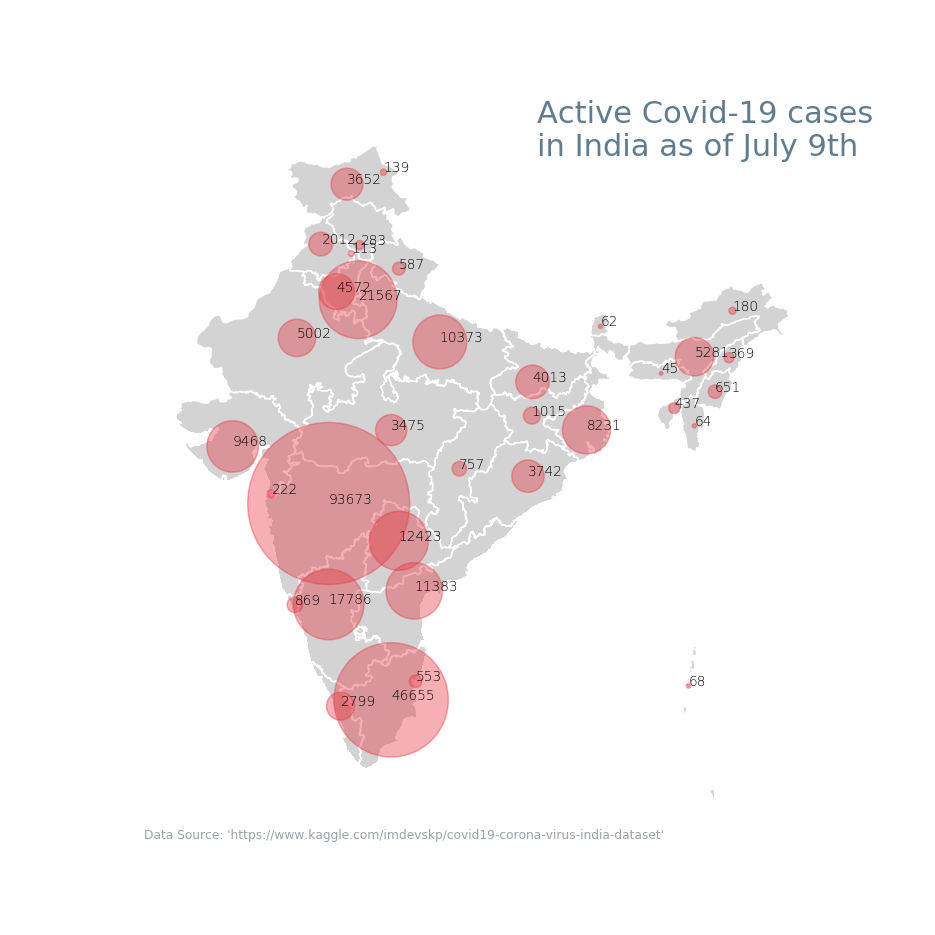

In [71]:
ax = india.plot( figsize=(8.5,8.5), facecolor='lightgray', edgecolor='white')

In [72]:
ax.scatter(cov['Longitude'], cov['Latitude'], color='#e63946', marker='o', s=cov['active cases']*0.12, alpha=0.4);

In [73]:
#plt.gca().set_facecolor('white')
# plt.gca().set_facecolor('#f0efeb')

In [74]:
for spine in plt.gca().spines.values():
    spine.set_visible(False)

In [75]:
for i in range(len(cov['active cases'])):
    plt.gca().text(x = cov.iloc[i]['Longitude'], y = cov.iloc[i]['Latitude'], s = str(cov.iloc[i]['active cases']),
                   fontname='fira code', fontweight='light', fontsize=9, color='black')

In [76]:
ax.text(85.5, 35, 'Active Covid-19 cases\nin India as of July 9th', color='#607c8e', fontsize=20);

In [77]:
plt.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)

In [16]:
# plt.gcf().figimage(im, 585, 300, alpha=0.5, zorder=3);

In [78]:
ax.text(67, 5, "Data Source: 'https://www.kaggle.com/imdevskp/covid19-corona-virus-india-dataset'", fontsize=8, ha='left', fontname='fira code ', 
        color='xkcd:slate', alpha=0.6);

In [19]:
#plt.gcf().savefig('vis4_copy.png', dpi=120)

# Visualization 4

In [79]:
cov_data = pd.read_csv('./covid_india_dataset/complete.csv', skiprows=list(range(1,443)), parse_dates=['Date'] )

In [80]:
cov_data.drop(columns=['Latitude', 'Longitude'], inplace=True)

In [81]:
cov_data.tail()

,Date,Name of State / UT,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
3308,2020-07-10,Telangana,30946,331,18192,1410,7,913
3309,2020-07-10,Tripura,1776,1,1338,15,0,14
3310,2020-07-10,Uttar Pradesh,32362,862,21127,1206,17,796
3311,2020-07-10,Uttarakhand,3305,46,2672,47,0,22
3312,2020-07-10,West Bengal,25911,854,16826,1088,27,535


In [82]:
df = cov_data[cov_data['Date'] == '2020-07-10']


In [83]:
worst_affctd_states = [i for i in df[df['Total Confirmed cases'] > 20000]['Name of State / UT'] ]
#worst_affctd_states 

In [84]:
# def check_affectd_states(n):
#     for i in worst_affctd_states:
#         if n == i:
#             return True
#     return False
    

# statewise_data = cov_data[cov_data['Name of State / UT'].apply(check_affectd_states)]

In [85]:
worst_affctd_states_data = cov_data[cov_data['Name of State / UT'].isin(worst_affctd_states)]

In [86]:
statewise_data = worst_affctd_states_data.groupby('Name of State / UT')

In [87]:
statewise_data.last()          #['Total Confirmed cases'].sort_values(ascending=False).index

,Date,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
Name of State / UT,,,,,,,
Andhra Pradesh,2020-07-10,23814,277,12154,1555,13,1053
Delhi,2020-07-10,107051,3258,82226,2187,45,4027
Gujarat,2020-07-10,39194,2008,27718,861,15,429
Karnataka,2020-07-10,31105,486,12833,2228,16,957
Maharashtra,2020-07-10,230599,9667,127259,6875,219,4067
Rajasthan,2020-07-10,22563,491,17070,500,9,204
Tamil Nadu,2020-07-10,126581,1765,78161,4231,65,3994
Telangana,2020-07-10,30946,331,18192,1410,7,913
Uttar Pradesh,2020-07-10,32362,862,21127,1206,17,796


In [88]:
#cmap = plt.get_cmap('tab20')
#colors = '#7F3C8D,#11A579,#3969AC,#F2B701,#E73F74,#80BA5A,#E68310,#008695,#CF1C90,#f97b72'.split(',')  
# colors1 = '''#003f5c
# #2f4b7c
# #665191
# #a05195
# #d45087
# #f95d6a
# #ff7c43
# #ffa600
# #553555
# #d90429'''.split('\n')

#colors1 = ['black' 'lightblue', 'green', 'cyan', 'red', 'yellow', 'magenta', 'brown',  'grey', 'lightred', 'lightwellow']

color_sequence = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c',
                  '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5',
                  '#8c564b', '#c49c94', '#e377c2', '#f7b6d2', '#7f7f7f',
                  '#c7c7c7', '#bcbd22', '#dbdb8d', '#17becf', '#9edae5']



In [119]:
# np.random.shuffle(color_sequence)   # Uncomment this to shuffle the color scheme and see which color fits best
#color_sequence1 = color_sequence
# color_sequence2 = color_sequence
color_sequence3 = color_sequence

<IPython.core.display.Javascript object>


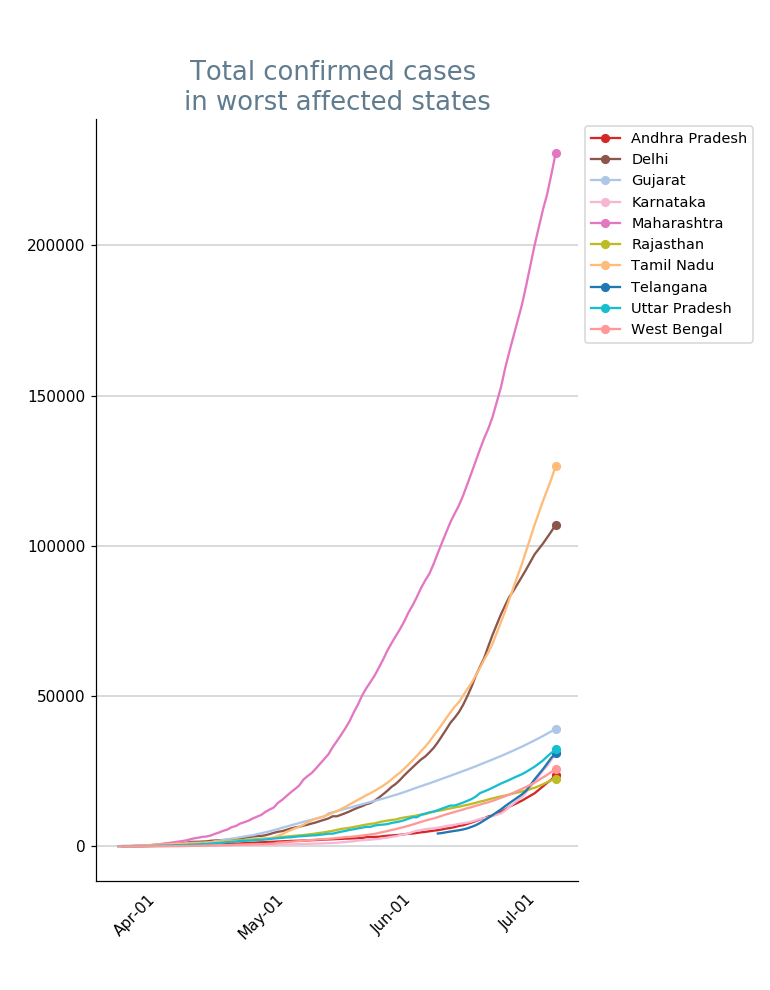

In [120]:
fig, ax = plt.subplots(figsize=(7, 9))

i=0
for group, data in statewise_data:
    ax.plot(data['Date'], data['Total Confirmed cases'], label=f'{group}', marker='o', markevery=[-1], markersize=5,
             color=color_sequence3[i])
    i = i+1


In [82]:
#plt.subplots_adjust(left=0, right=0.92)

In [121]:
fmt = mdates.DateFormatter('%b-%d')

In [122]:
ax.xaxis.set_major_formatter(fmt)

In [123]:
for i, item in enumerate(ax.xaxis.get_ticklabels()):       # fig.autofmt_xdate()
    
    item.set_rotation(45)
    
#     if i%2 == 0:
#         item.set_visible(False)
    
#     if i == 0:
#         continue
#     elif i == 6:
#         continue
#     elif i%2 == 0:
#         item.set_visible(False)
    
    


In [124]:
ax.tick_params(bottom=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [125]:
#ax.yaxis.tick_right()

In [126]:
ax.set_title('Total confirmed cases \nin worst affected states', color='#607c8e', fontsize=17)

Text(0.5, 1.0, 'Total confirmed cases \nin worst affected states')

In [127]:
dates = ['', 'Apr-01',
'',
'',
'May-01',
'',
'',
'Jun-01',
'',
'',
'Jul-01',
'']

In [128]:
ax.xaxis.set_ticklabels(dates);

In [38]:
#ax.get_yticks()

In [129]:
# for i in [50000, 100000, 150000, 200000]:
#     ax.axhline(i, color='xkcd:slate', alpha=0.7, zorder=0)

plt.grid(True, 'major', 'y', lw=1, c='xkcd:slate', alpha=.3)

In [130]:
plt.legend(fontsize=9.5, bbox_to_anchor=(1, 1), loc='upper left')

In [131]:
plt.subplots_adjust(right=0.75)

In [43]:
#fig.savefig('vis4.png', dpi=120)